In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('bmh')

df = pd.read_csv('Vendas.csv', delimiter=',')


## Busca A


In [2]:
data = []
vendas_ano = {}
anos = {}

for index, row in df.iterrows():
    data = list(map(int, row['Data Venda'].split('/')))
    aux = data[2]
    anos = aux
    if aux in vendas_ano:
        vendas_ano[data[2]] += row['ValorVenda']
    else:
        vendas_ano[data[2]] = row['ValorVenda']
        

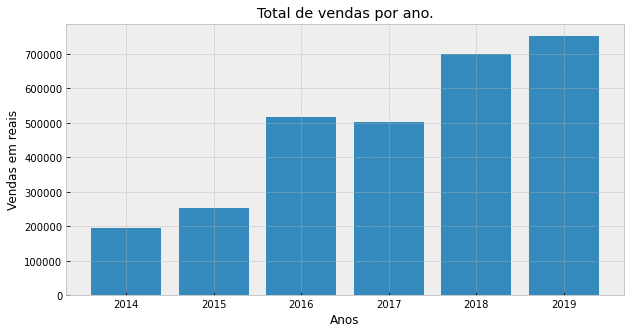

In [3]:
fig, ax = plt.subplots()
vendas_axis = np.arange(len(vendas_ano.keys()))
plt.xticks(vendas_axis, vendas_ano.keys())
fig.set_size_inches(10, 5)
plt.bar(vendas_axis, list(vendas_ano.values()))
plt.title("Total de vendas por ano.")
plt.xlabel("Anos")
plt.ylabel("Vendas em reais")

plt.show()


## Busca B


In [4]:
cat = {}

for index, row in df.iterrows():
    ax = row['Categoria']
    if ax in cat:
        cat[ax] += int(row['ValorVenda'])
    else:
        cat[ax] = int(row['ValorVenda'])

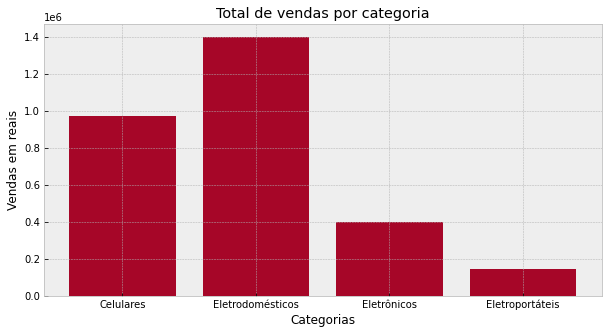

In [5]:
fig, ax = plt.subplots()
cat_axis = np.arange(len(cat.keys()))
plt.xticks(cat_axis, cat.keys())
fig.set_size_inches(10, 5)
plt.bar(cat_axis, list(cat.values()))


plt.bar(cat_axis, list(cat.values()))
plt.title("Total de vendas por categoria")
plt.xlabel("Categorias")
plt.ylabel("Vendas em reais")
plt.show()

## Busca C

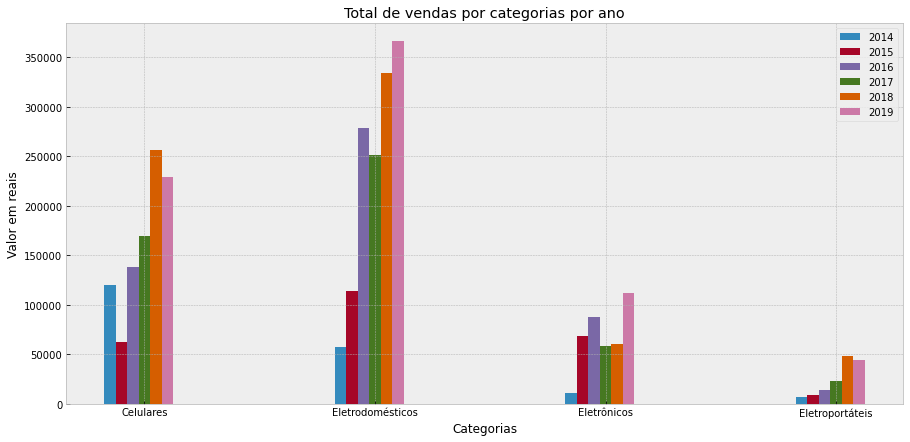

In [6]:
anos_cat_values = []

for index, row in df.iterrows():
    dia, mes, ano = row['Data Venda'].split('/')
    
    anos_cat_values.append([row['Categoria'], ano, row['ValorVenda']])

categorias = {x[0]:[] for x in anos_cat_values}
anos = list(set([x[1] for x in anos_cat_values]))
anos.sort()

valores = []
valor = 0

for cat in categorias.keys():
    aux = []
    for ano in anos:
        for acv in anos_cat_values:
            if acv[0] == cat and acv[1] == ano:
                valor += acv[2]
        aux.append(valor)
        valor = 0
    categorias[cat] = aux


fig, ax = plt.subplots()
categorias_axis = np.arange(len(categorias))
plt.xticks(categorias_axis, categorias)

for ano_i in range(len(anos)):
    valores_por_ano = []
    for cat in categorias.keys(): 
        valores_por_ano.append(categorias[cat][ano_i])
    plt.bar(categorias_axis - 0.15 + 0.05 * ano_i, valores_por_ano, 0.05, label = anos[ano_i])
       
fig.set_size_inches(15, 7)
plt.title('Total de vendas por categorias por ano')
plt.xlabel("Categorias")
plt.ylabel("Valor em reais")
plt.legend()
plt.show()


## Busca D


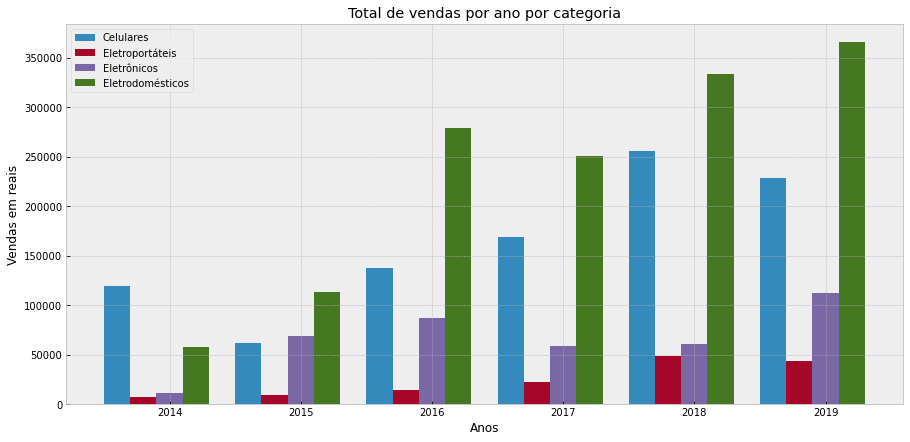

In [7]:
celulares = {x:0 for x in anos}
eletroportateis = {x:0 for x in anos}
eletronicos = {x:0 for x in anos}
eletrodomesticos = {x:0 for x in anos}



for elements in anos_cat_values:
    if elements[0] == 'Celulares':
        celulares[elements[1]] += elements[2]
    elif elements[0] == 'Eletroportáteis':
        eletroportateis[elements[1]] += elements[2]
    elif elements[0] == 'Eletrônicos':
        eletronicos[elements[1]] += elements[2]        
    elif elements[0] == 'Eletrodomésticos':
        eletrodomesticos[elements[1]] += elements[2]

anos_axis = np.arange(len(anos))
fig, ax = plt.subplots()
plt.bar(anos_axis - 0.4, celulares.values(), 0.2, label = 'Celulares')
plt.bar(anos_axis - 0.2, eletroportateis.values(), 0.2, label = 'Eletroportáteis')
plt.bar(anos_axis + 0.0, eletronicos.values(), 0.2, label = 'Eletrônicos')
plt.bar(anos_axis + 0.2, eletrodomesticos.values(), 0.2, label = 'Eletrodomésticos')
plt.xticks(anos_axis, anos)
fig.set_size_inches(15, 7)
plt.title('Total de vendas por ano por categoria')
plt.xlabel("Anos")
plt.ylabel("Vendas em reais")
plt.legend()
plt.show()

## Busca E

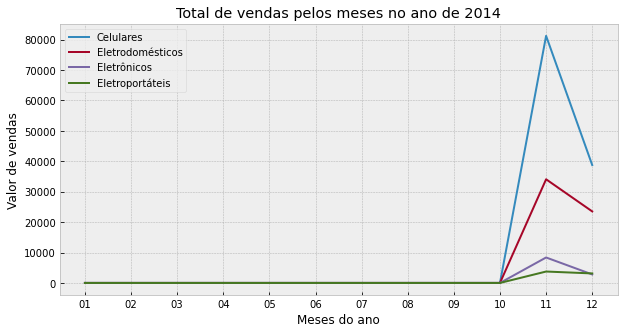

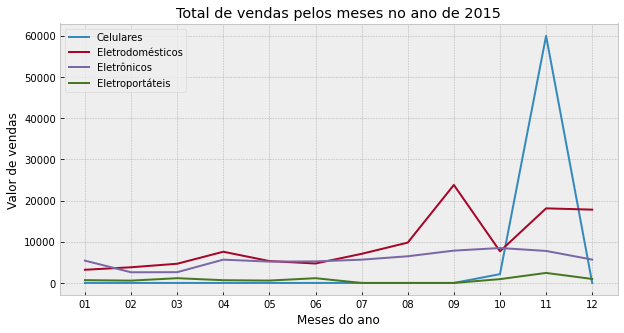

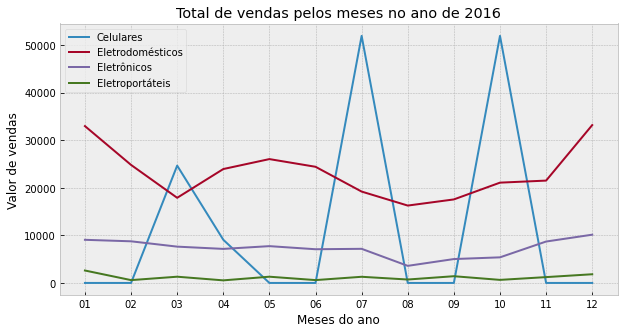

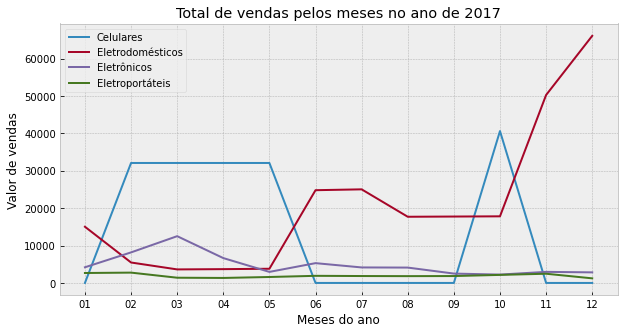

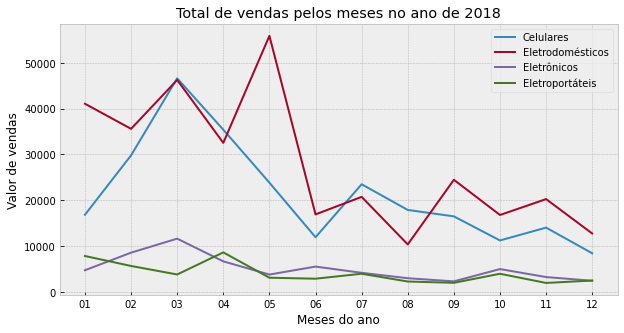

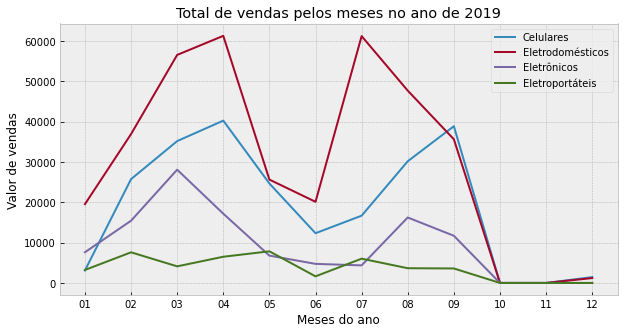

In [8]:
busca_e = []

for index, row in df.iterrows():
    dia, mes, ano = row['Data Venda'].split('/')
    busca_e.append([ano, mes, row['Categoria'], row['ValorVenda']])

anos_e = anos.copy()
meses = list(set([x[1] for x in busca_e]))
meses.sort()
categorias_e = list(categorias.keys())

for ano in anos_e:
    cats_meses = []
    for cat in categorias_e:
        valor_plot = []
        for mes in meses:
            valor = 0
            for elements in busca_e:
                if elements[0] == ano and elements[1] == mes and elements[2] == cat:
                    valor += elements[3]
            valor_plot.append(valor)
        cats_meses.append([cat, valor_plot])
    fig, ax = plt.subplots()
    fig.set_size_inches(10,5)

    for cats in cats_meses:
        plt.plot(meses, cats[1], label = cats[0])
    plt.title(f'Total de vendas pelos meses no ano de {ano}')
    plt.xlabel('Meses do ano')
    plt.ylabel('Valor de vendas')
    plt.legend()
    plt.show()
                      

## Busca F


In [9]:
fabricantes = []
fab_prods = []
modelos = []

for index, row in df.iterrows():
    fab_prods.append(tuple([row['Fabricante'], row['Produto']]))

for n in set(fab_prods):
    fabricantes.append([n[0], n[1], fab_prods.count(n)])

fabricantes = sorted(fabricantes, key = lambda x : x[2], reverse = True)

dic_fab = {x[0]:-1 for x in fabricantes}

for a in fabricantes:
    if dic_fab[a[0]] == -1:
        dic_fab[a[0]] = a[2]
        modelos.append(a[1])


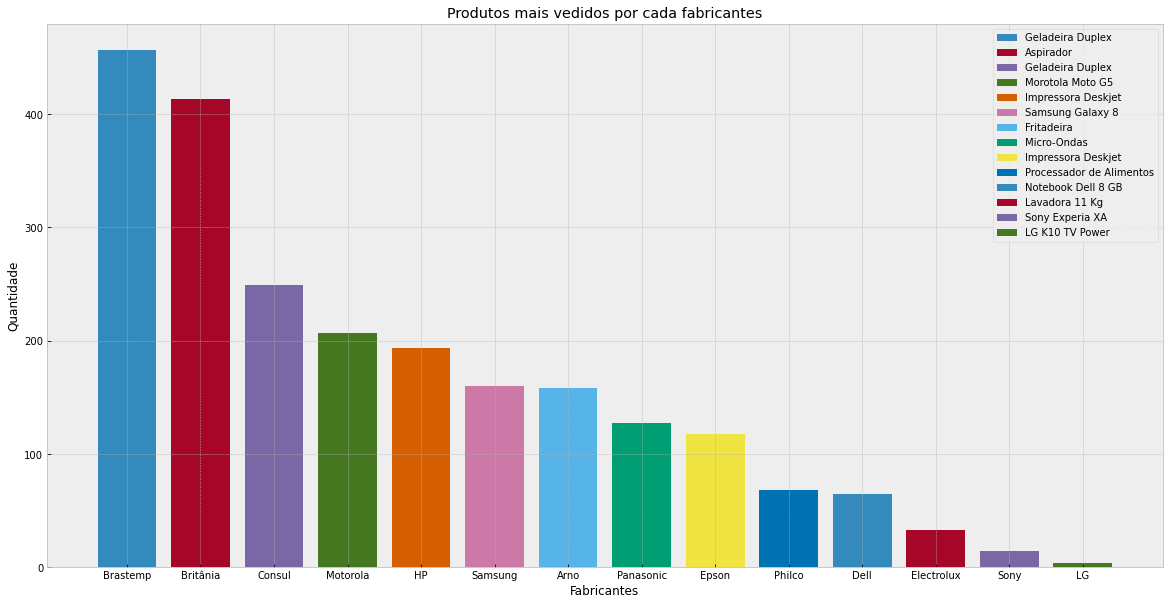

In [10]:
comp_axis = np.arange(len(dic_fab.keys()))
fig, ax = plt.subplots()
plt.xticks(comp_axis, dic_fab.keys())
fig.set_size_inches(20, 10)
plt.title('Produtos mais vedidos por cada fabricantes')
plt.xlabel("Fabricantes")
plt.ylabel("Quantidade")

var = 0
for df_i in dic_fab.keys():
    plt.bar(df_i, dic_fab[df_i], label = modelos[var])
    var += 1
plt.legend()
plt.show()

## Busca G

In [11]:
lojas_cat_value = []
lojas_cat = []
g = []
valor = 0

for index, row in df.iterrows():
    lojas_cat_value.append([row['Loja'], row['Categoria'], row['ValorVenda']])
    lojas_cat.append(tuple([row['Loja'], row['Categoria']]))

lojas_cat_dic = {tuple([x[0], x[1]]) for x in set(lojas_cat)}

for dic_elements in lojas_cat_dic:
    for tb_elements in lojas_cat_value:
        if tb_elements[0] == dic_elements[0] and tb_elements[1] == dic_elements[1]:
            valor += tb_elements[2]
    g.append([dic_elements[0], dic_elements[1], valor])
    valor = 0

g = sorted(g, key = lambda x : x[0])

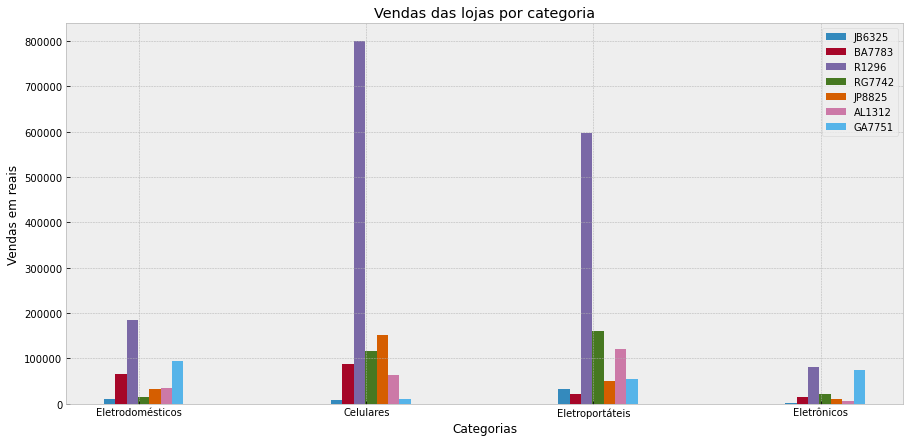

In [12]:
lojas = {x[0] for x in g}
cat_c = set(x[1] for x in g)

fig, ax = plt.subplots()

cat_c_axis = np.arange(len(cat_c))
plt.xticks(cat_c_axis, cat_c)

var = 0.2 
for loja in lojas:

    aux = []
    for elements in g:
        if elements[0] == loja:
            aux.append([elements[1], elements[2]])

    plt.bar(cat_c_axis - 0.18 + 0.25 * var, [x[1] for x in aux], 0.05, label = loja)
    var += 0.2

fig.set_size_inches(15, 7)
plt.title('Vendas das lojas por categoria')
plt.xlabel('Categorias')
plt.ylabel('Vendas em reais')
plt.legend()
plt.show()
    

## Busca H
### pt. 1

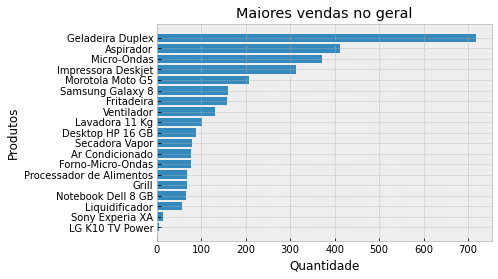

In [13]:
# carregando base de dados em formato de tupla
# (nome_item, nome_loja)

prodLoja = []
for index, row in df.iterrows():
    prodLoja.append(tuple([row['Produto'], row['Loja']]))


# --------------------- 1a parte da questao -------------------------------- 
''' prodLoja(produto/item[0], loja[1]) '''
dicItems = {x[0] for x in prodLoja} 
qntItemsGlobal = []

''' adicionando em qntItemsGlobal o produto e sua quantidade '''
for item in dicItems:
    qntItemsGlobal.append([item, [x[0] for x in prodLoja].count(item)])

''' ordenando em ordem decrescente '''
ordItems = sorted(qntItemsGlobal, key = lambda x : x[1])

prods, qnt = [], []

for i in range(len(ordItems)):
    prods.append(ordItems[i][0])
    qnt.append(int(ordItems[i][1]))

plt.title("Maiores vendas no geral")
plt.xlabel("Quantidade")
plt.ylabel("Produtos")
plt.barh(prods, qnt)
plt.show()


## Busca H
### pt. 2


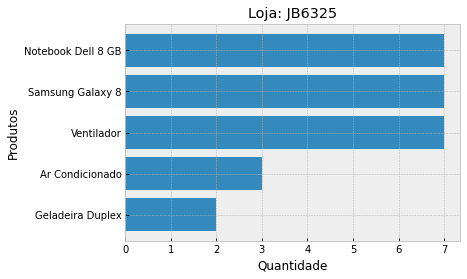

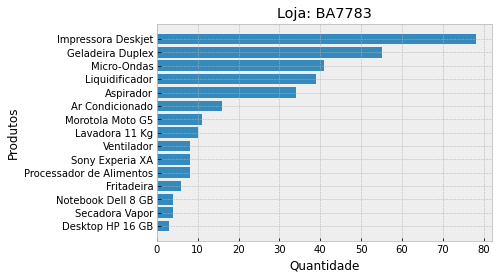

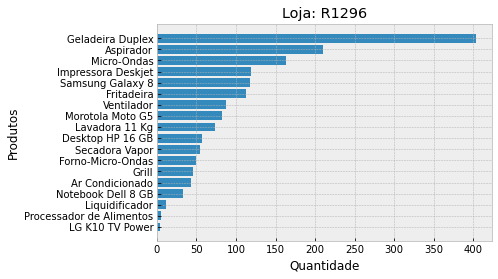

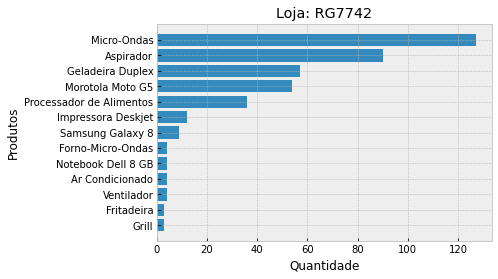

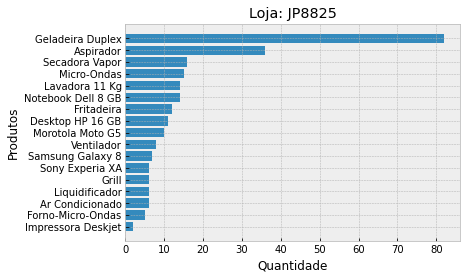

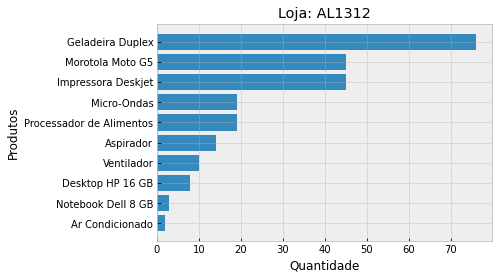

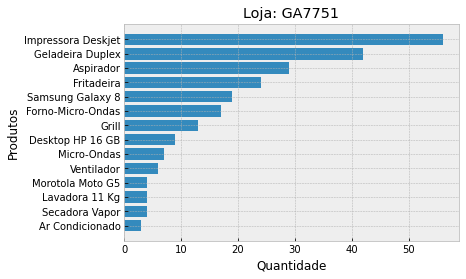

In [14]:
# --------------------- 2a parte da questao --------------------------------
''' preechendo dicLojas com todas as lojas da base. 
    prodLoja(produto/item[0], loja[1]) '''
dicLojas = {x[1] for x in prodLoja} 

''' para cada loja, é adicionada os items respectivos a ela em itemLoja
    se a loja da dupla verificada for a mesma que a loja (a loja do for) verificada
    itemLoja recebe (item, loja). '''
for loja in dicLojas:
    itemLoja = []
    for dupla in prodLoja:
        if dupla[1] == loja:
            itemLoja.append(dupla)
    itemQnt = []

    ''' set = conjunto disjunto; items nao repetidos
        ordItemLoja recebe o item e a quantidade do mesmo para a loja em questao
        ordItemLoja é ordenado '''
    for item in set(itemLoja):
        itemQnt.append([item[0], itemLoja.count(item)])
    itemQnt = sorted(itemQnt, key = lambda x : x[1], reverse = False)

    title = f'Loja: {loja}'
    plt.title(title)
    plt.xlabel("Quantidade")
    plt.ylabel("Produtos")
    plt.barh([n[0] for n in itemQnt], [n[1] for n in itemQnt])
    plt.show()
    

## Busca I
### pt. 1

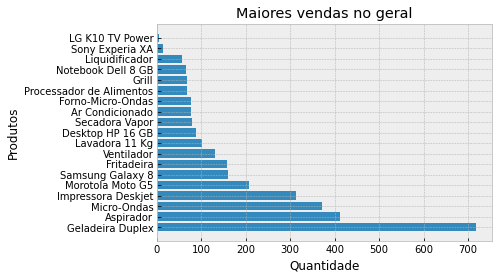

In [15]:
prods.reverse()
qnt.reverse()
plt.title("Maiores vendas no geral")
plt.xlabel("Quantidade")
plt.ylabel("Produtos")
plt.barh(prods, qnt)
plt.show()


## Busca I
### pt. 2

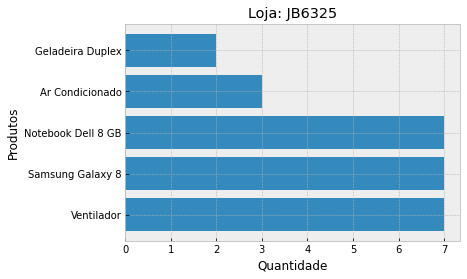

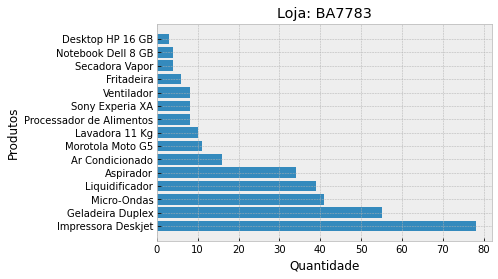

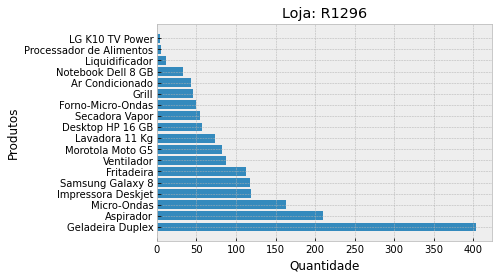

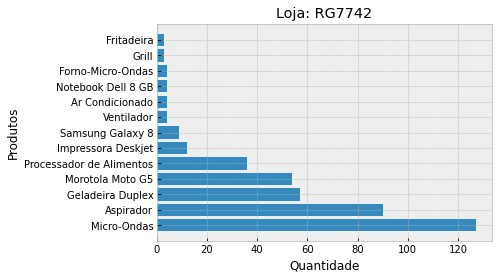

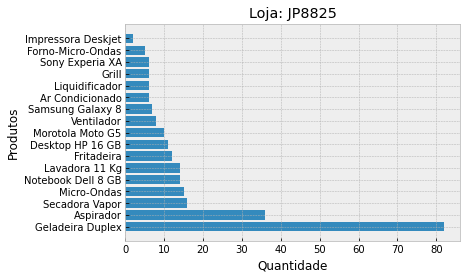

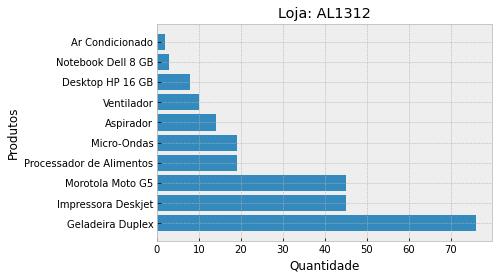

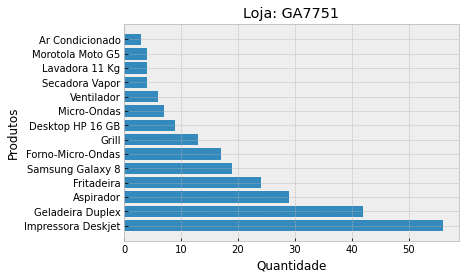

In [16]:
for loja in dicLojas:
    itemLoja = []
    for dupla in prodLoja:
        if dupla[1] == loja:
            itemLoja.append(dupla)
    itemQnt = []

    ''' set = conjunto disjunto; items nao repetidos
        ordItemLoja recebe o item e a quantidade do mesmo para a loja em questao
        ordItemLoja é ordenado '''
    for item in set(itemLoja):
        itemQnt.append([item[0], itemLoja.count(item)])
    itemQnt = sorted(itemQnt, key = lambda x : x[1], reverse = True)
    
    title = f'Loja: {loja}'
    plt.title(title)
    plt.xlabel("Quantidade")
    plt.ylabel("Produtos")
    plt.barh([n[0] for n in itemQnt], [n[1] for n in itemQnt])
    plt.show()
    

## Busca J
### 1a pt.

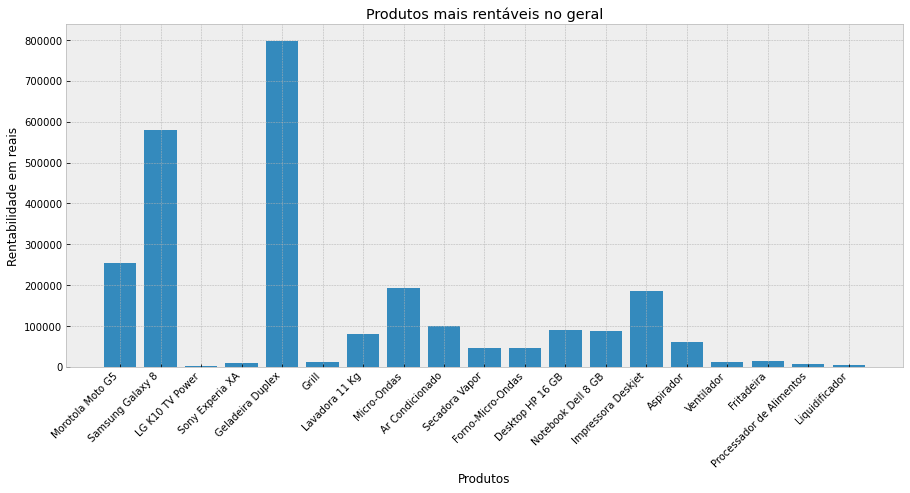

In [17]:
loja_prod_valor = []
prod_valor_geral = {}

for index, row in df.iterrows():
    valor = row['ValorVenda'] - row['preçoCusto']
    prod = row['Produto']
    loja_prod_valor.append([row['Loja'], prod, valor])
    
    
    
    if prod in prod_valor_geral:
        prod_valor_geral[prod] += valor
    else:
        prod_valor_geral[prod] = valor


vet_aux = [[x, prod_valor_geral[x]] for x in list(prod_valor_geral.keys())]
vet_aux = sorted(vet_aux, key = lambda x : x[1], reverse = True)
fig, ax = plt.subplots()

plt.bar(prod_valor_geral.keys(), prod_valor_geral.values())

fig.autofmt_xdate(rotation=45)
fig.set_size_inches(15, 7)

plt.title('Produtos mais rentáveis no geral')
plt.xlabel("Produtos")
plt.ylabel("Rentabilidade em reais")

plt.show()

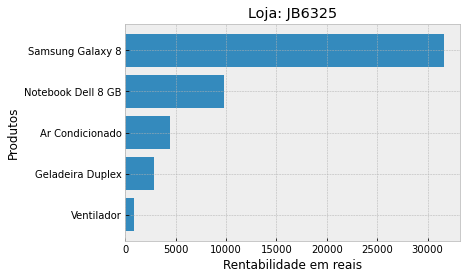

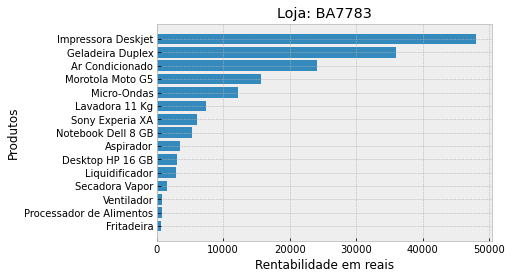

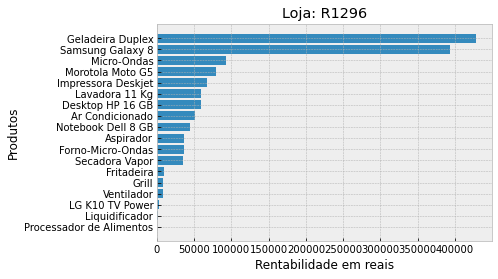

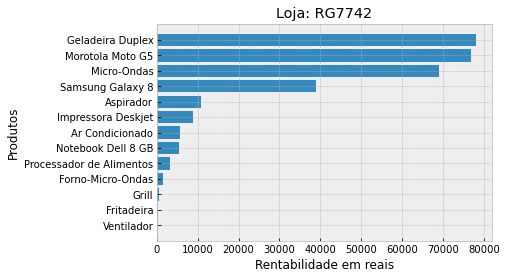

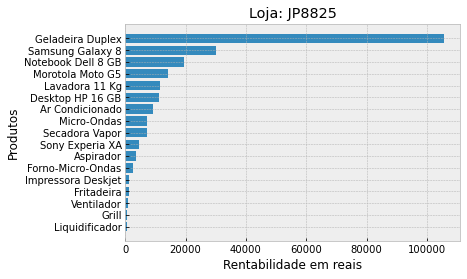

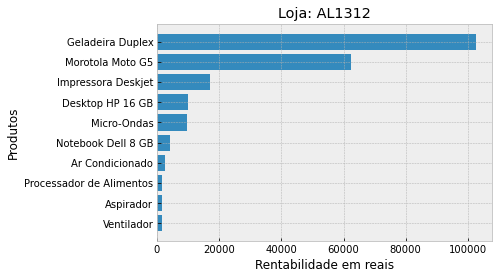

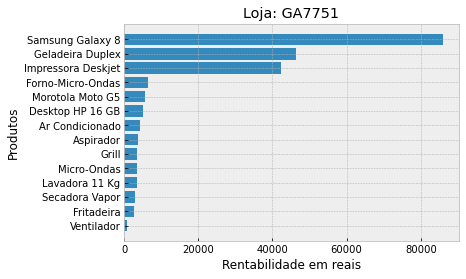

In [18]:
for loja in dicLojas:
    ord_prod_valor = []
    
    for x in loja_prod_valor:
        if x[0] == loja:
            somado = False
            
            '''verifica se o produto ja existe em ord_prod_valor '''
            for produto_valor in ord_prod_valor:
                if produto_valor[0] == x[1]:
                    produto_valor[1] += x[2]
                    somado = True

            if not somado:
                ord_prod_valor.append([x[1], x[2]])
    
    ord_prod_valor = sorted(ord_prod_valor, key = lambda x : x[1])
    title = f'Loja: {loja}'
    plt.title(title)
    plt.xlabel("Rentabilidade em reais")
    plt.ylabel("Produtos")
    plt.barh([n[0] for n in ord_prod_valor], [n[1] for n in ord_prod_valor])
    plt.show()

## Busca K

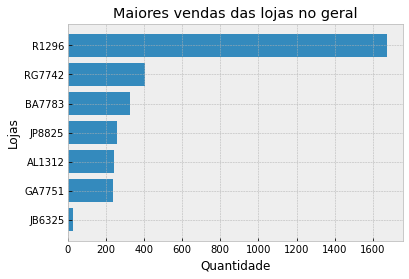

In [19]:
prodLoja = []
for index, row in df.iterrows():
    prodLoja.append(row['Loja'])

qntItemsLoja = [[n, prodLoja.count(n)] for n in set(prodLoja)]
qntItemsLoja = sorted(qntItemsLoja, key = lambda x : x[1])


plt.title("Maiores vendas das lojas no geral")
plt.xlabel("Quantidade")
plt.ylabel("Lojas")
plt.barh([n[0] for n in qntItemsLoja], [n[1] for n in qntItemsLoja])
plt.show()

## Busca L

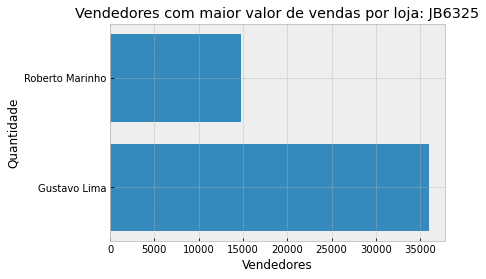

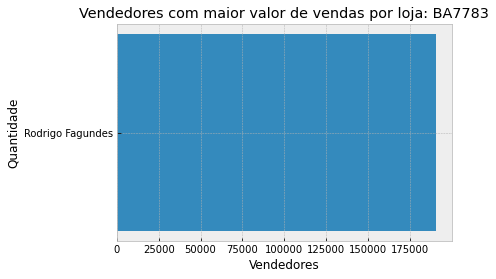

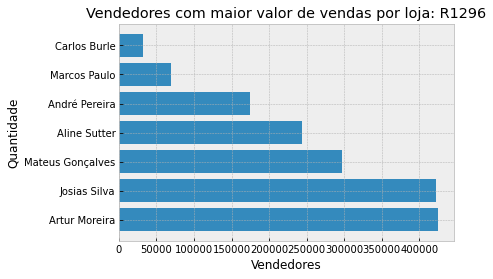

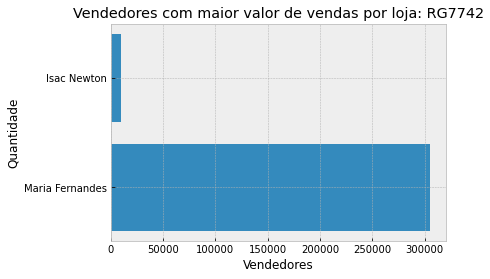

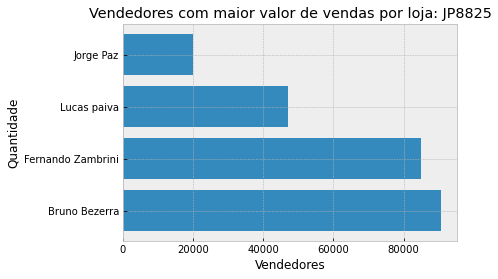

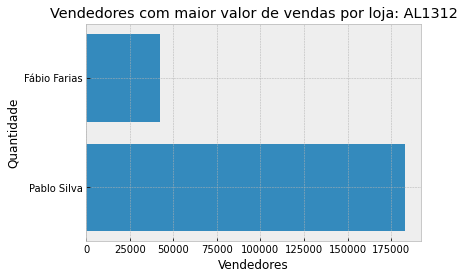

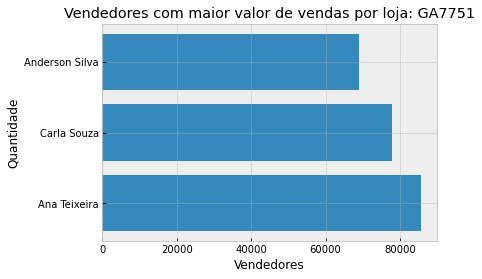

In [20]:
data_base = []

for index, row in df.iterrows():
    dia, mes, ano = row['Data Venda'].split('/')
    data_base.append([ano, row['Loja'], row['ValorVenda'], row['Vendedor']])

dic_vendedor = {x[3]:0 for x in data_base}

#pt 1 --------------------------------------------------

for loja in dicLojas:
    clone_vendedor = dic_vendedor.copy()
    for datab in data_base:
        if loja == datab[1]:
            clone_vendedor[datab[-1]] += datab[2]
    
    vet_vendedor = []
    for vendedor in clone_vendedor.keys():
        if clone_vendedor[vendedor] != 0:
            vet_vendedor.append([vendedor, clone_vendedor[vendedor]])
    vet_vendedor = sorted(vet_vendedor, key = lambda x : x[1], reverse = True)

    title = f'Vendedores com maior valor de vendas por loja: {loja}'
    plt.title(title)
    plt.xlabel("Vendedores")
    plt.ylabel("Quantidade")
    plt.barh([n[0] for n in vet_vendedor], [n[1] for n in vet_vendedor])
    plt.show()
    


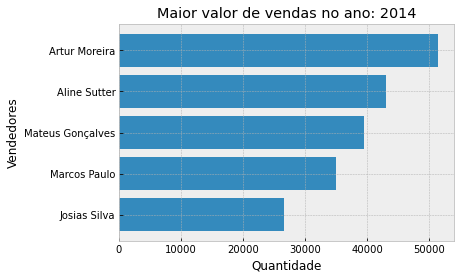

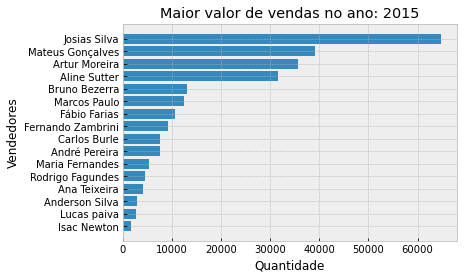

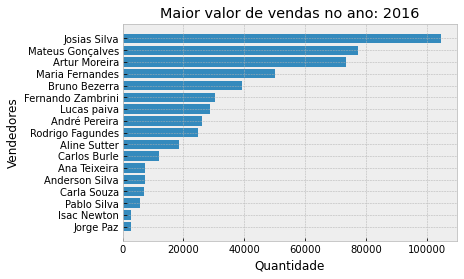

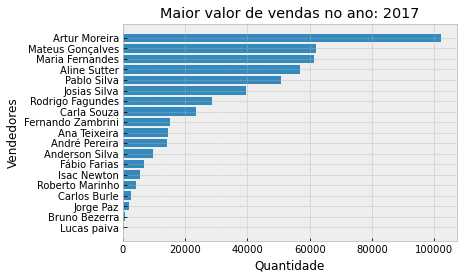

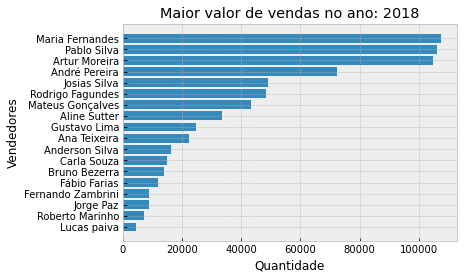

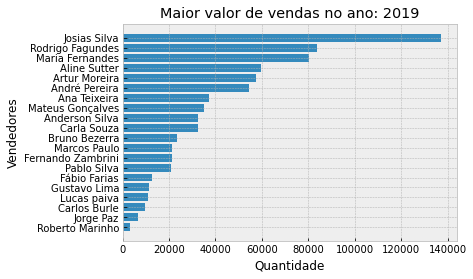

In [21]:
# pt 2 ------------------------------------

dic_ano = list(set([x[0] for x in data_base]))
dic_ano.sort()

for ano in dic_ano:
    clone_vendedores = dic_vendedor.copy()
    for elements in data_base:
        if ano == elements[0]:
            clone_vendedores[elements[-1]] += elements[2]
            
            
            
    vet_vendedor = []
    
    for vendedor in clone_vendedores.keys():
        if clone_vendedores[vendedor] != 0:
            vet_vendedor.append([vendedor, clone_vendedores[vendedor]])
            
    vet_vendedor = sorted(vet_vendedor, key = lambda x : x[1])
    title = f'Maior valor de vendas no ano: {ano}'
    plt.title(title)
    plt.xlabel("Quantidade")
    plt.ylabel("Vendedores")
    plt.barh([n[0] for n in vet_vendedor], [n[1] for n in vet_vendedor])
    plt.show()
    

### A) Quais possíveis produtos de fabricantes poderiam ser descartados para venda?

</p> Analisando a 1ª parte da busca I, podemos ver o modelo LG k10 TV Power e Sony Experia XA são os modelos menos vendidos de toda a base e também uns dos menos rentáveis, podemos supor então que são modelos não atrativos para o consumidor e que não dão muito lucro, logo os fabricantes deveriam dar mais atenção e analisar o caso comparando se o investimento para tais produtos valem a pena comparado a investir o mesmo valor em outros modelos que dêem mais lucros para empresa. 

### B) Quais os possíveis fabricantes e produtos que poderiam ser negociados melhores preços de compras dos produtos?

</p> De acordo com a análise da busca J, vemos que a geladeira duplex da Brastemp, Galaxy samsung 8 da e Motorola Moto G5 são os produtos mais rentáveis e também mais vendidos (busca H), dito isso os preços poderiam ser revistos. 